## Time Series Data

Time series data is another important class of data. In this session we will explore few Pandas capabilities exploring time series data. The data set that we will use for the current session is  from Kaggle https://www.kaggle.com/mahirkukreja/delhi-weather-data

In [ ]:
import pandas as pd

data = pd.read_csv('data/DailyDelhiClimateTest.csv')

In [ ]:
data.to_pickle('data/climateData.pickle')

Pandas offers many intuitive ways of slicing your data

print only the column of _dewptm:

In [ ]:
print(df._dewptm)
print(df[‘_dewptm’])


prints only rows 2 to 4:

In [ ]:
print(df[2:5])

provide a list of column names in order to slice multiple columns:

In [ ]:
print(df[[‘_dewptm’,’_fog’]])

df.loc can slice multiple columns and rows at the same time. You can think of its inputs as a combination of normal python list indexing and pandas column indexing as shown previously

print rows 2 to 4 of the columns _dewptm and _fog:

In [ ]:
print(df.loc[2:5, [‘_dewptm’,’_fog’]])

In [ ]:
data.loc[0:31,'meantemp'].mean()

15.696470314024472

<AxesSubplot:>

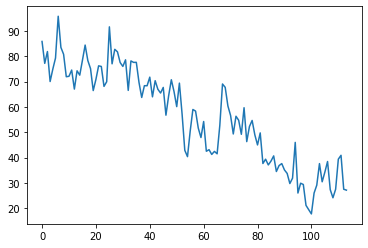

In [ ]:
data['humidity'].plot()

In [ ]:
data = pd.read_csv('data/DailyDelhiClimateTest.csv',index_col='date')

In [ ]:
data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


<AxesSubplot:xlabel='date'>

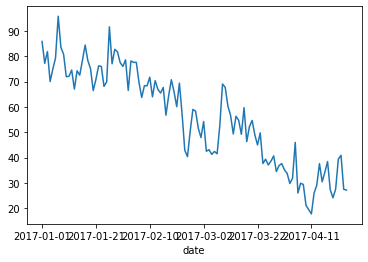

In [ ]:
data['humidity'].plot()

In [ ]:
# help(data.resample)

In [ ]:
data.index

Index(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
       '2017-01-06', '2017-01-07', '2017-01-08', '2017-01-09', '2017-01-10',
       ...
       '2017-04-15', '2017-04-16', '2017-04-17', '2017-04-18', '2017-04-19',
       '2017-04-20', '2017-04-21', '2017-04-22', '2017-04-23', '2017-04-24'],
      dtype='object', name='date', length=114)

In [ ]:
data.index = pd.to_datetime(data.index)

In [ ]:
data.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-04-15', '2017-04-16', '2017-04-17', '2017-04-18',
               '2017-04-19', '2017-04-20', '2017-04-21', '2017-04-22',
               '2017-04-23', '2017-04-24'],
              dtype='datetime64[ns]', name='date', length=114, freq=None)

We can use the resample function to return a unique sampling distribution of a time series about a given frequency. In this example we use 'M' to resample with each month as a frequency. 

In [ ]:
data.resample('M').mean()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-31,15.710873,77.188256,7.162982,986.767947
2017-02-28,18.349981,64.375728,7.566294,1015.574251
2017-03-31,23.753760,48.009694,8.884385,1010.469641
2017-04-30,30.753663,30.408185,9.128446,1004.564831


<AxesSubplot:xlabel='date'>

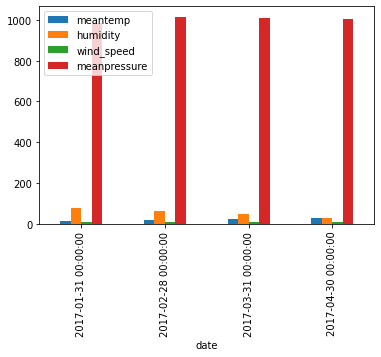

In [ ]:
data.resample('M').mean().plot(kind="bar")